# Module 17 Checkpoint 4 (Data cleaning 3: outliers) Assignment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [3]:
# Use interpolation over each year to fill in nulls
imputable_columns = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

years = education_df["YEAR"].unique()

for year in years:
    education_df.loc[education_df["YEAR"] == year, imputable_columns] = education_df.loc[education_df["YEAR"] == year, imputable_columns].interpolate()

# Drop any data that doesn't include year, those will still have nulls
education_df.dropna(inplace=True)

# Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

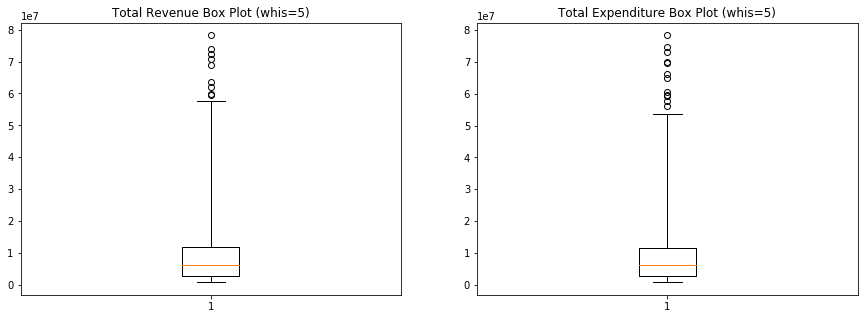

In [4]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(education_df["TOTAL_REVENUE"], whis = 5)
plt.title("Total Revenue Box Plot (whis=5)")

plt.subplot(1,2,2)
plt.boxplot(education_df["TOTAL_EXPENDITURE"], whis = 5)
plt.title("Total Expenditure Box Plot (whis=5)")
plt.show()

# If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [5]:
# WINSORIZE!
from scipy.stats.mstats import winsorize

winsorized_revenue = winsorize(education_df["TOTAL_REVENUE"], (0, 0.05))

winsorized_expenditure = winsorize(education_df["TOTAL_EXPENDITURE"], (0, 0.05))

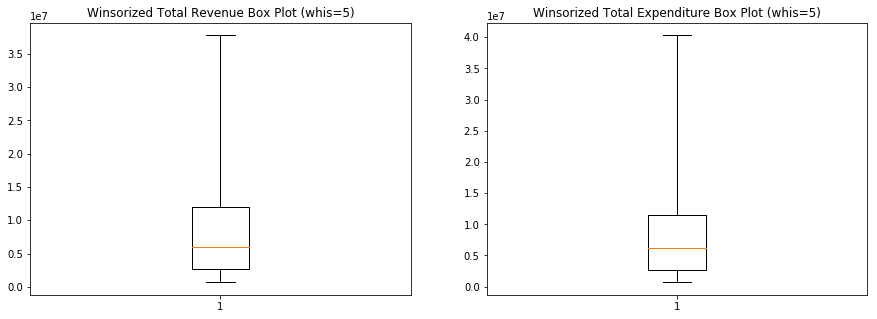

In [6]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(winsorized_revenue, whis = 5)
plt.title("Winsorized Total Revenue Box Plot (whis=5)")

plt.subplot(1,2,2)
plt.boxplot(winsorized_expenditure, whis = 5)
plt.title("Winsorized Total Expenditure Box Plot (whis=5)")
plt.show()

# Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

Text(0.5, 1.0, 'Deficit Box Plot (whis=5)')

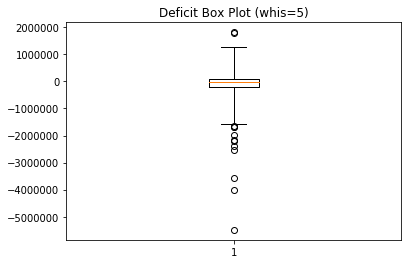

In [7]:
deficit = education_df.TOTAL_REVENUE - education_df.TOTAL_EXPENDITURE
plt.boxplot(deficit, whis = 5)
plt.title("Deficit Box Plot (whis=5)")

Text(0.5, 1.0, 'Winsorized Deficit Box Plot (whis=5)')

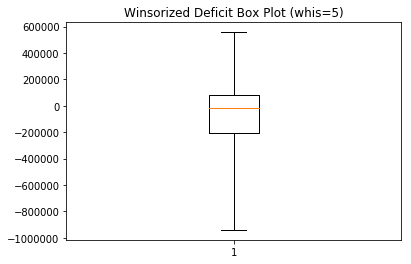

In [8]:
# WINSORIZE AGAIN!
winsorized_deficit = winsorize(deficit, (0.05, 0.05))
plt.boxplot(winsorized_deficit, whis = 5)
plt.title("Winsorized Deficit Box Plot (whis=5)")

# Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

Text(0.5, 1.0, 'Deficit2 Box Plot (whis=5)')

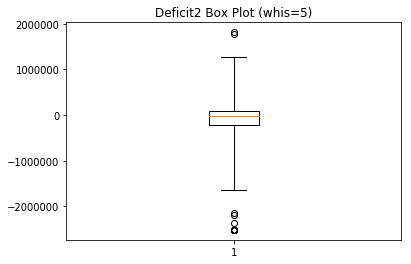

In [9]:
deficit2 = winsorized_revenue - winsorized_expenditure
plt.boxplot(deficit2, whis = 5)
plt.title("Deficit2 Box Plot (whis=5)")

Text(0.5, 1.0, 'Winsorized Deficit2 Box Plot (whis=5)')

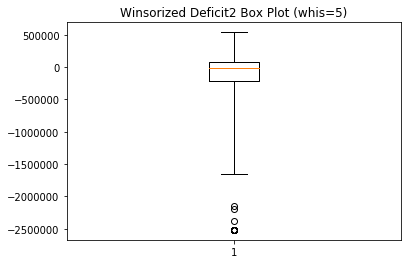

In [10]:
# MOAR WINSORIZE
winsorized_deficit2 = winsorize(deficit2, (0.05, 0.05))
plt.boxplot(winsorized_deficit2, whis = 5)
plt.title("Winsorized Deficit2 Box Plot (whis=5)")

# Compare some basic descriptive statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?

In [11]:
pd.DataFrame({"original_deficit": deficit, "winsorized_deficit1": winsorized_deficit,
              "winsorized_deficit2": winsorized_deficit2}).describe()

,original_deficit,winsorized_deficit1,winsorized_deficit2
count,4.160000e+02,416.000000,4.160000e+02
mean,-1.066341e+05,-72673.185096,-1.822610e+05
std,6.006208e+05,344115.738058,6.479960e+05
min,-5.487742e+06,-940187.000000,-2.518429e+06
25%,-2.040230e+05,-204023.000000,-2.133122e+05
50%,-1.434850e+04,-14348.500000,-1.522650e+04
75%,8.359700e+04,83597.000000,8.224000e+04
max,1.816932e+06,557170.000000,5.400550e+05


There are pretty significant differences in the 2 different winsorized versions and the original - I think adding in more industry knowledge/intuition would help to determine which is the proper course of action to pursue.

# If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the third question or the one in the fourth question?

As above, this depends on what other background knowledge/intuition can be applied. However, generally speaking, I think it is better to modify the original data than to further modify already modified data (the closer the data is to its original form, the better the final conclusions will be).